In [ ]:
!pip install shap==0.44.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 2.9 MB/s eta 0:00:00


  0%|          | 0/36 [00:00<?, ?it/s]

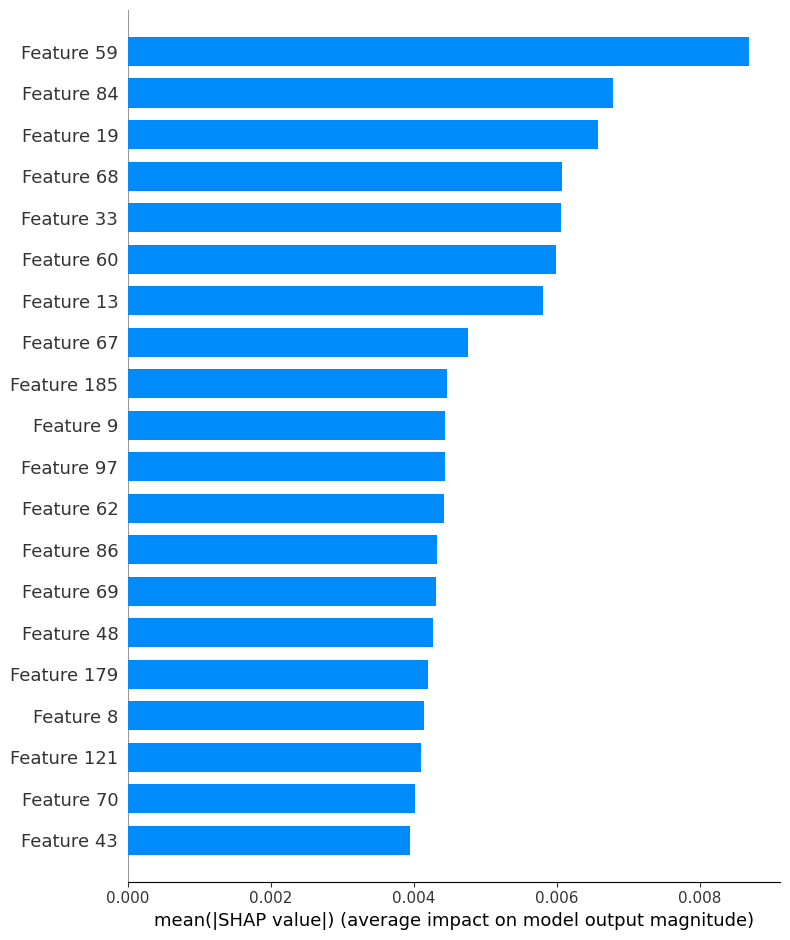

In [ ]:
#SHAP
#!pip install shap
import shap
import pickle

# Carregar o modelo do arquivo
with open('modeloRF.pkl', 'rb') as file:
    model = pickle.load(file)

with open('X_trainRF.pickle', 'rb') as file:
    X_train = pickle.load(file)

with open('X_testRF.pickle', 'rb') as file:
    X_test = pickle.load(file)


# Usar KernelExplainer
explainer = shap.KernelExplainer(model.predict_proba, X_train)

# Calcular SHAP values para o conjunto de teste
shap_values = explainer.shap_values(X_test)

# Visualizar a importância das features para a primeira classe como exemplo
shap.summary_plot(shap_values[0], X_test, plot_type="bar")

In [ ]:
import numpy as np

important_features_index = np.argsort(-np.abs(np.array(shap_values).mean(0)).mean(0))[:10]

# Selecionar os dados apenas com as features importantes
X_train_selected = X_train[:, important_features_index]
X_test_selected = X_test[:, important_features_index]

In [ ]:
import pandas as pd


dataset = pd.read_excel('Input_Total.xlsx')
dataset = dataset.loc[:,dataset.apply(pd.Series.nunique) != 1]
dataset = dataset.filter(regex=r'^(?!.*Keq)')
dataset = dataset.drop('Classe', axis=1)
dataset = dataset.drop('Átomos', axis=1)
dataset = dataset.drop('DOI', axis=1)


nomes_das_colunas = dataset.columns[important_features_index]

print("Nomes das colunas correspondentes:", nomes_das_colunas.tolist())

lista_classes = model.classes_
print(lista_classes)

#primeira rodada SHAP Nomes das colunas correspondentes: ['electronegativity_ghosh_soma', 'vel_of_sound_soma',
#'poissons_ratio_desvio', 'atomic_ea_media', 'supercond_temp_maximo', 'atomic_spacegroupnum_desvio',
#'atomic_orbital_radii_soma', 'brinell_hardness_desvio', 'entropia-oxidos_media', 'coeff_of_lte_maximo']

Nomes das colunas correspondentes: ['atomic_radius_calculated_media', 'atomic_radius_calculated_soma', 'atomic_radius_soma', 'vickers_hardness_soma', 'boiling_point_desvio', 'liquid_range_media', 'mineral_hardness_desvio', 'valence_d_eletrons_soma', 'coordenacao_soma', 'liquid_range_soma']
['fluorite' 'monoclinic' 'multiphase' 'ortho perovskite' 'perovskite'
 'pyrochlore' 'rocksalt' 'spinel']


In [ ]:
# Tuning floresta aleatoria
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import GridSearchCV


with open('y_trainRF.pickle', 'rb') as file:
    y_train = pickle.load(file)

param_grid = {

        'n_estimators' : [50,100,200,500,550,600,750],
        'max_depth' : [5,6,7,8,9,10,11,12,13,14,15],
        'max_features' : ['sqrt', 'log2'],
        'max_leaf_nodes' : [7,9,12,14,16,18],
        'criterion' : ['gini', 'entropy', 'log_loss']

  }

classifier = RandomForestClassifier()
grid_search = GridSearchCV(estimator = classifier, param_grid = param_grid,
                            cv = 2, n_jobs = -1, verbose = 2)



grid_search.fit(X_train_selected, y_train)
print(grid_search.best_params_)

Fitting 2 folds for each of 2772 candidates, totalling 5544 fits
{'criterion': 'entropy', 'max_depth': 13, 'max_features': 'sqrt', 'max_leaf_nodes': 16, 'n_estimators': 50}


In [ ]:
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy',
                                    random_state = 16,max_depth= 13,max_features='sqrt',
                                    max_leaf_nodes= 18)


classifier.fit(X_train_selected, y_train)



RandomForestClassifier(criterion='entropy', max_depth=13, max_leaf_nodes=18,
                       n_estimators=50, random_state=16)

In [ ]:
with open('y_testRF.pickle', 'rb') as file:
    y_test = pickle.load(file)


y_pred = classifier.predict(X_test_selected)


print(accuracy_score(y_test, y_pred))

0.7222222222222222


In [ ]:
with open('modeloRF_72.pickle', 'wb') as f:
  pickle.dump(classifier, f)

In [2]:
#Estatisticas

import pickle
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd


dataset = pd.read_excel('Input_Total.xlsx')
dataset = dataset.loc[:,dataset.apply(pd.Series.nunique) != 1]
dataset = dataset.filter(regex=r'^(?!.*Keq)')
dataset = dataset.drop('Classe', axis=1)
dataset = dataset.drop('Átomos', axis=1)
dataset = dataset.drop('DOI', axis=1)

# Caminho para os arquivos pickle
path_to_X_train = 'X_trainRF.pickle'
path_to_X_test = 'X_testRF.pickle'
path_to_model = 'modeloRF_72.pickle'
path_to_y_test = 'y_testRF.pickle'

# Carregar X_test
with open(path_to_X_train, 'rb') as file:
    X_train = pickle.load(file)


with open(path_to_X_test, 'rb') as file:
    X_test = pickle.load(file)

# Carregar modelo
with open(path_to_model, 'rb') as file:
    model = pickle.load(file)

# Carregar y_test
with open(path_to_y_test, 'rb') as file:
    y_test = pickle.load(file)



In [3]:
nomes_das_colunas = ['atomic_radius_calculated_media', 'atomic_radius_calculated_soma', 'atomic_radius_soma', 'vickers_hardness_soma', 'boiling_point_desvio', 'liquid_range_media', 'mineral_hardness_desvio', 'valence_d_eletrons_soma', 'coordenacao_soma', 'liquid_range_soma']

column_indices = [dataset.columns.get_loc(name) for name in nomes_das_colunas]

# Exibir os índices
print(column_indices)



# Selecionar os dados apenas com as features importantes
X_train_selected = X_train[:, column_indices]
X_test_selected = X_test[:, column_indices]

[40, 39, 34, 131, 49, 86, 95, 182, 160, 85]


In [4]:
print(accuracy_score(y_test, model.predict(X_test_selected)))

0.7222222222222222


In [5]:
X_test = X_test_selected.copy()
X_train= X_train_selected.copy()

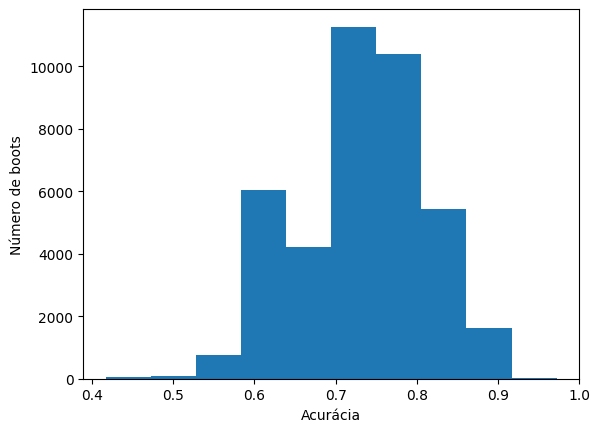

Intervalo de confiança : [0.5833333333333334,0.8611111111111112]
Acurácia 'real' do modelo performada no teste : 0.7222222222222222


In [ ]:
import random
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

# Intervalo de confiança da acurácia

def new_boot(X_test, y_test):
  novo_X = X_test.copy()

  novo_Y = y_test.copy()

  c= 0
  while c < len(X_test):
    rand = random.randint(0,len(X_test)-1)
    novo_X[c] = X_test[rand].copy()
    novo_Y[c] = y_test[rand]

    c= c+1


  return novo_X , novo_Y

# Pega a acurácia de um boot
# Ajuste em pegar a mérica sem ser pelo report
def pegar_acuracia_do_relatorio(novo_X , novo_Y):

  return accuracy_score(novo_Y, model.predict(novo_X), sample_weight=None)


# calcula a distribuição dos boots

numero_boots = 40001
lista_boots = []
contador = 0

while contador < numero_boots:
  x, y = new_boot(X_test, y_test)
  lista_boots.append(pegar_acuracia_do_relatorio(x, y))
  contador =contador +1

plt.hist(lista_boots)
plt.xlabel('Acurácia')
plt.ylabel('Número de boots')
plt.show()

#converte a lista em float explicitamente para a função percentile ser aplicada
array = list()
for elemento in lista_boots:
  array.append(float(elemento))

# calcula os limites da integral da gaussiana que correspondem a área desejada

alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower =  np.percentile(array, p)
p = (alpha+((1.0-alpha)/2.0)) * 100
upper =  np.percentile(array, p)

print("Intervalo de confiança : ["+str(lower)+","+str(upper)+"]")
print("Acurácia 'real' do modelo performada no teste : "+ str(accuracy_score(y_test, model.predict(X_test), sample_weight=None)))

In [ ]:


# Exibir as classes possíveis
classes_possiveis = model.classes_



# Duas listas fornecidas
list1 = y_test
list2 = classes_possiveis

# Eliminando elementos de list2 que não estão em list1
filtered_list2 = [item for item in list2 if item in list1]

# Exibindo a lista filtrada
print(filtered_list2)

['fluorite', 'monoclinic', 'multiphase', 'perovskite', 'pyrochlore', 'spinel']


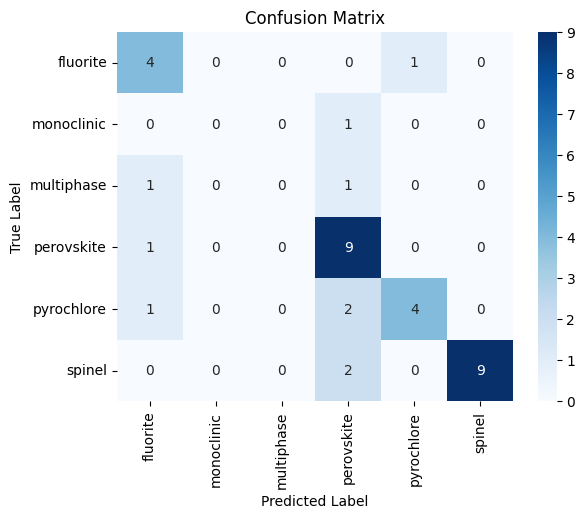

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que 'model' é o seu modelo treinado e 'X_test', 'y_test' são seus dados de teste
# Primeiro, você precisa fazer previsões usando o seu conjunto de teste
y_pred = model.predict(X_test)

# Gere a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Obtenha os nomes das classes
class_names = filtered_list2

# Para melhor visualização, você pode usar o Seaborn para plotar a matriz de confusão
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


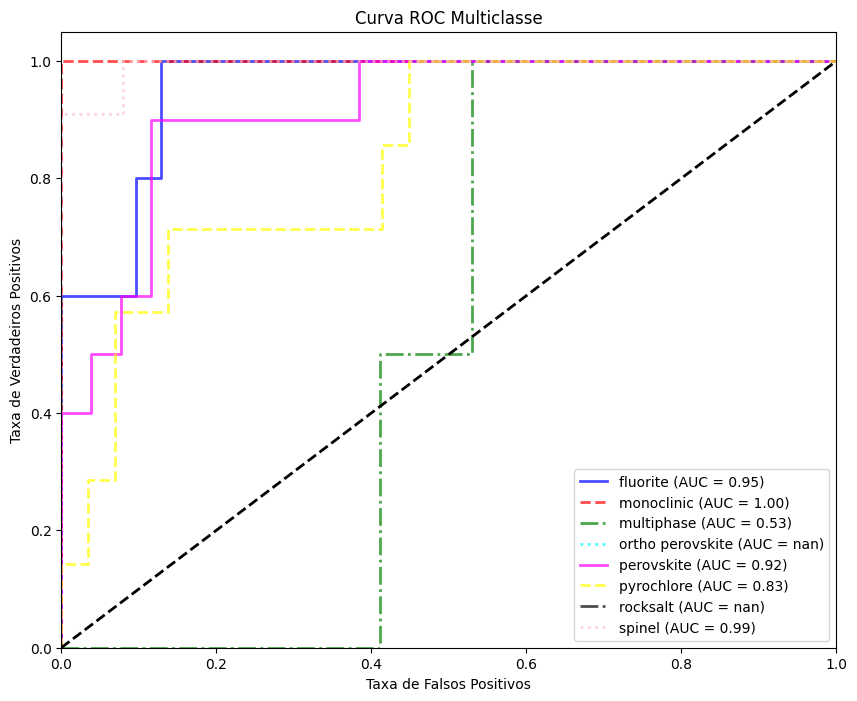

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

# Supondo que y_test já esteja disponível e não seja binário
# Se y_test já for binário (em formato one-hot), você pode pular esta etapa
# Binarizar os rótulos em uma configuração um contra todos
classes = model.classes_
y_test_binarized = label_binarize(y_test, classes=classes)
n_classes = y_test_binarized.shape[1]

# Prever probabilidades. Certifique-se de que seu modelo tem um método `predict_proba`
y_score = model.predict_proba(X_test)

# Computar ROC curve e ROC area para cada classe
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Associar os nomes das classes binarizadas
class_labels = model.classes_

# Garantir que class_labels corresponde às classes
assert len(class_labels) == len(classes), "O número de class_labels deve corresponder ao número de classes."

# Plot da curva ROC para cada classe
colors = cycle(['blue', 'red', 'green', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightblue', 'gray', 'orange', 'purple'])
linestyles = cycle(['-', '--', '-.', ':'])
plt.figure(figsize=(10, 8))
for i, (color, linestyle) in zip(range(n_classes), zip(colors, linestyles)):
    plt.plot(fpr[i], tpr[i], color=color, linestyle=linestyle, lw=2, alpha=0.7,
             label='{0} (AUC = {1:0.2f})'.format(class_labels[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC Multiclasse')
plt.legend(loc="lower right")
plt.show()


In [6]:
#SHAP
!pip install shap==0.44.1
import shap
import pickle

# Usar KernelExplainer
explainer = shap.KernelExplainer(model.predict_proba, X_train)

# Calcular SHAP values para o conjunto de teste
shap_values = explainer.shap_values(X_test)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 5.9 MB/s eta 0:00:00


  0%|          | 0/36 [00:00<?, ?it/s]

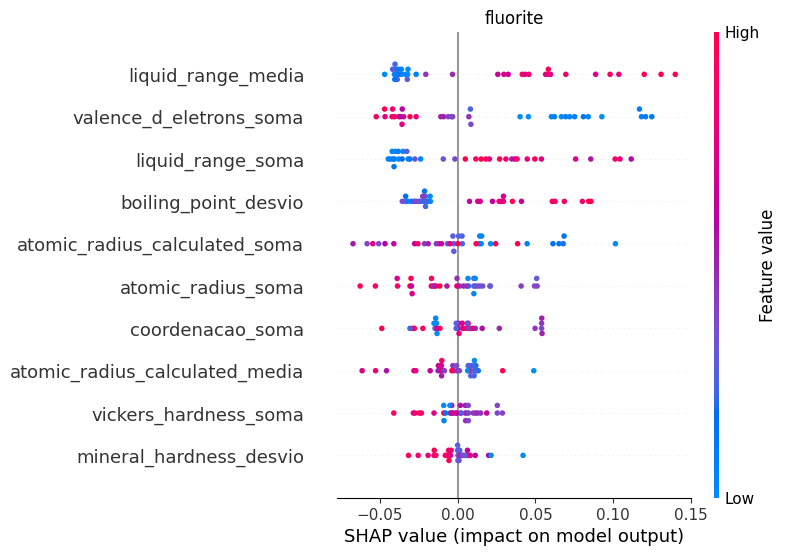

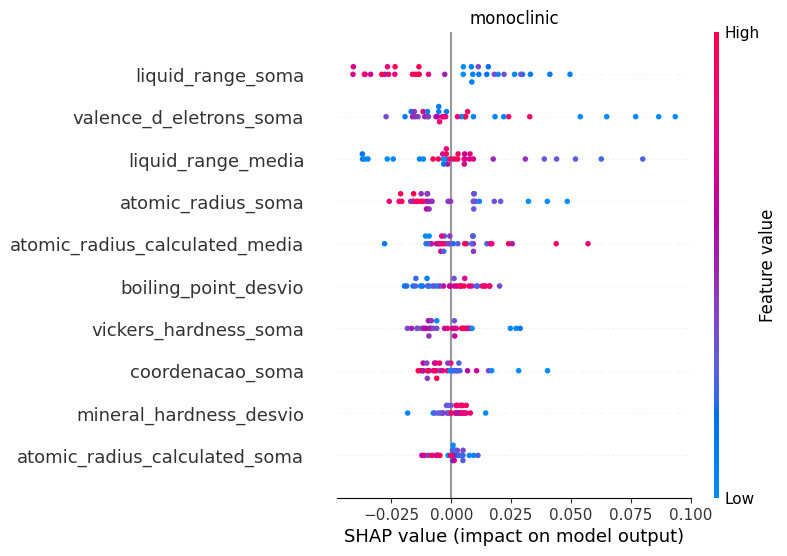

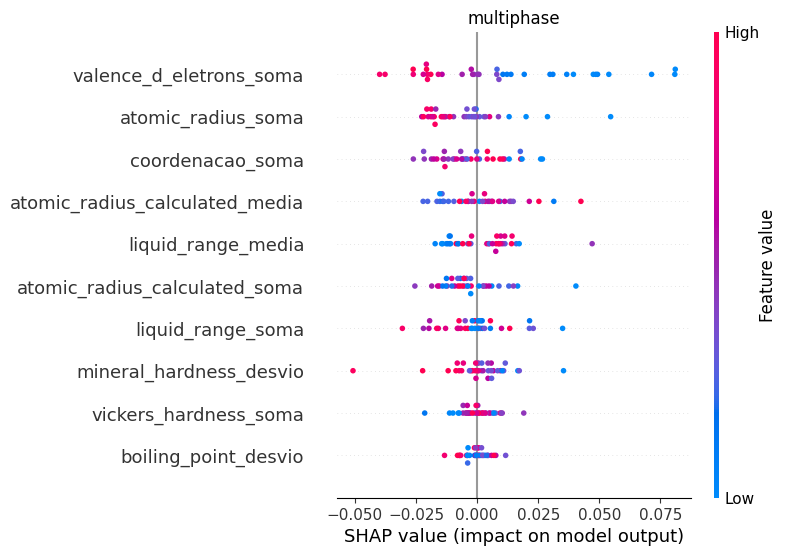

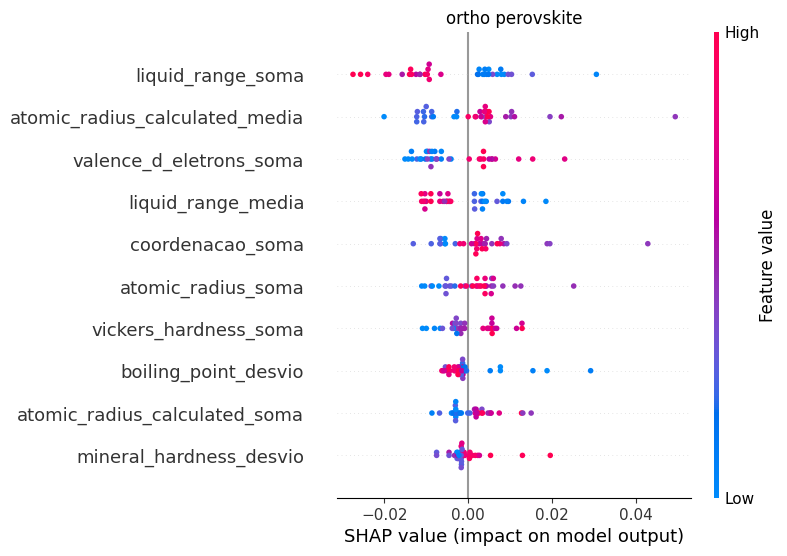

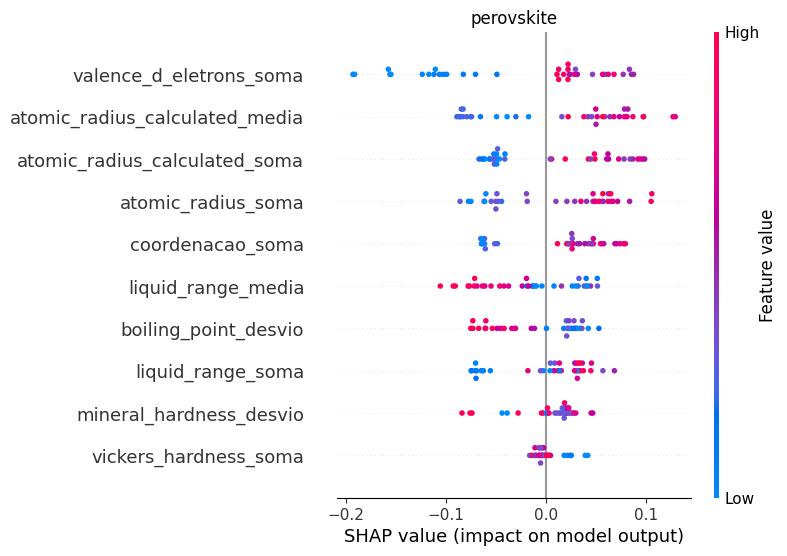

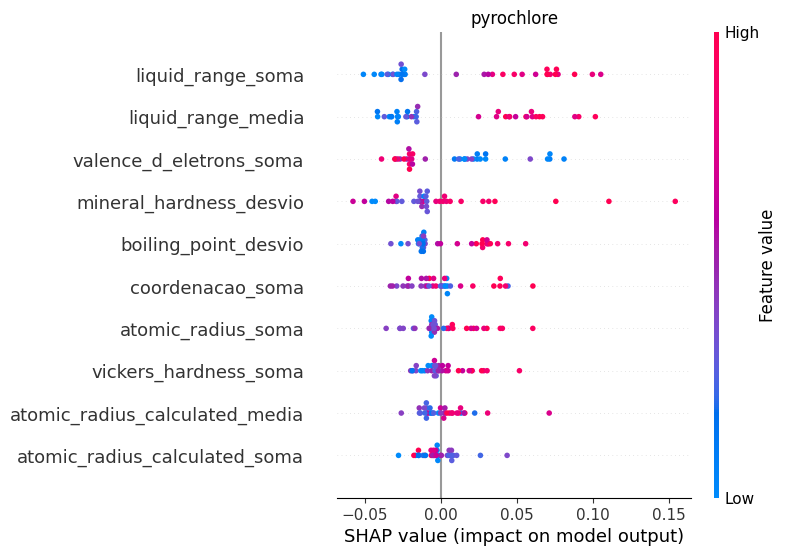

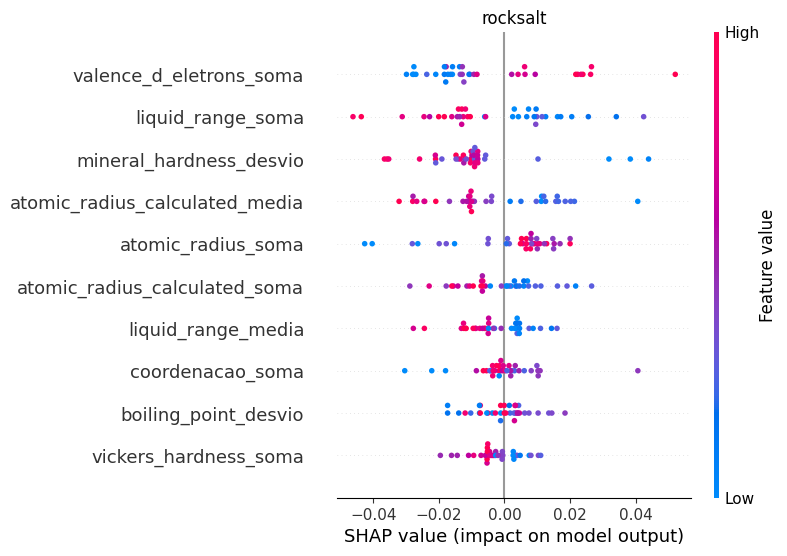

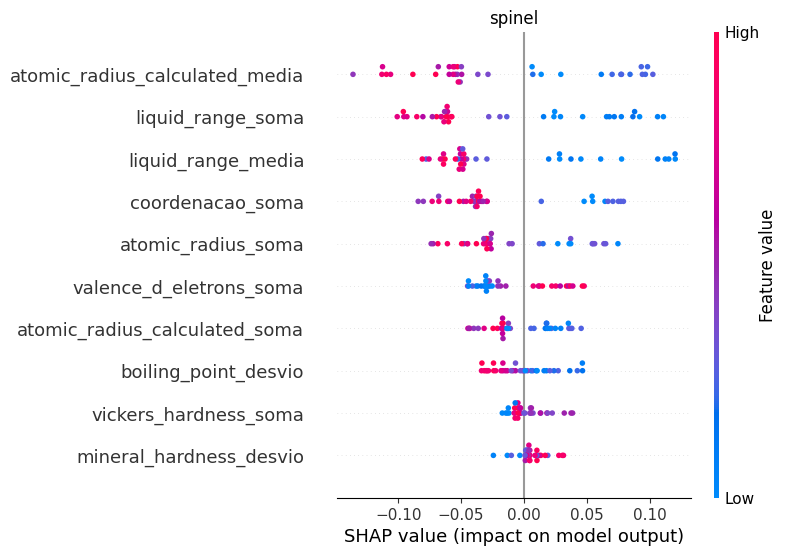

In [7]:
import matplotlib.pyplot as plt

feature_names  = nomes_das_colunas


lista_classes = model.classes_


# Visualizar a importância das features para a primeira classe como exemplo
count = 0
while len (shap_values)>count:

  shap.summary_plot(shap_values[count], X_test, plot_type="dot", feature_names = feature_names, show = False)
  plt.title(lista_classes[count])
  plt.show()

  count = count +1